# Solution to Exercises 

## Beginning Python Programming

**pandas**

In [4]:
# 1) Create your own data file with some interesting info. 
#    Read in the data into a dataframe  called df using pd.read_excel().
import pandas as pd
df=pd.read_excel("sugar.xlsx")

In [5]:
# 2) Display the first row of df
df.head(1)

Food  Grams of Sugar Recommended Daily Limit (25 grams)
0  BK Chocolate Shake             112                     4x daily limit

In [7]:
# 3) Abbreviate the column names.
df.columns=["food", "sugar(gm)","daily limit"]
# 4) Display the first line
df.head(1)

food  sugar(gm)     daily limit
0  BK Chocolate Shake        112  4x daily limit

In [8]:
# 5) Show how to use .loc() to get a particular entry in your dataframe.
df.loc[0,"sugar(gm)"]

112

**for loops**

In [9]:
import numpy as np
list1=np.arange(0,12,2)
print("list 1=", list1)
def addone(list1):
    for i in list1:
        print(i+1)
    return print("Mission Accomplished!")

addone(list1)

list 1= [ 0  2  4  6  8 10]
1
3
5
7
9
11
Mission Accomplished!


**If conditional statements**

In [11]:
list2=np.arange(0,22,2)
print("list2=",list2)

def halve_upper_half(list2):
    for i in list2:
        if i>10:
            print(i/2)
    return

halve_upper_half(list2)

list2= [ 0  2  4  6  8 10 12 14 16 18 20]
6.0
7.0
8.0
9.0
10.0


**Dataframes**

In [16]:
import pandas as pd
import numpy as np
rawCOVID = pd.read_json('https://data.cityofchicago.org/resource/yhhz-zm2v.json?$limit=100000') #Import data directly from data portal
COVID=rawCOVID[['deaths_cumulative', "population",  'tests_cumulative','zip_code']]
COVID.dropna  #drop rows with missing data
COVID.columns=["deaths","population","tests","zip"] #simplify the column names

In [17]:
def MyCOVID2(COVID,zipcode):
    alreadychecked=0  #eliminate duplication of information
    for z in COVID.index:  #go through all the index values
        if COVID.loc[z,"zip"]==zipcode and alreadychecked==0:    #found the zip we requested (first-time)
            alreadychecked=1  #we will only do this once
            df=COVID[COVID["zip"]==zipcode]
            numtested=df["tests"].max()
            numdeaths=df["deaths"].max()
            numpopulation=df["population"].max()
            print("Zip code: ", COVID.loc[z,"zip"])
            print("population is ", numpopulation)
            print("number tested is ", numtested)
            print("number deaths ", numdeaths)
            print("population is ", numpopulation)
    return ("Enter a different zip code if you wish.")

In [18]:
MyCOVID2(COVID,'60637')

Zip code:  60637
population is  47454
number tested is  416617
number deaths  107
population is  47454


'Enter a different zip code if you wish.'

## Glimpse of Chicago

**Predicting Exemplary Schools**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel("MiddleSchool.xlsx")

#---PREDICTION MODEL----#
def mypredict(df):
    for i in df.index:
        if (df.loc[i,"Teacher Retention Rate"]>=85 and df.loc[i,"Student Attendance Rate"]>=95 and df.loc[i,"# Student Enrollment"]<=267 and df.loc[i,"Student Chronic Truancy Rate"]<=2.9  and df.loc[i,"Teacher Retention Rate"]>=90.6) :  
            df.loc[i,"Prediction"]=1       
        else:
            df.loc[i,"Prediction"]=0
    return df

#---APPLY MODEL TO OUR DATA---#
mydf=mypredict(df)
mydf=mydf.reset_index(drop=True)

#---COMPUTE YOUR SCORE---#
TP=0
TN=0
FP=0
FN=0
numschools=0
for i in mydf.index:
    if mydf.loc[i,"Prediction"]==1 and mydf.loc[i,"Summative Designation"]=="Exemplary":
        TP=TP+1
    if mydf.loc[i,"Prediction"]==0 and mydf.loc[i,"Summative Designation"]!="Exemplary":
        TN=TN+1
    if mydf.loc[i,"Prediction"]==1 and mydf.loc[i,"Summative Designation"]!="Exemplary":
        FP=FP+1
    if mydf.loc[i,"Prediction"]==0 and mydf.loc[i,"Summative Designation"]=="Exemplary":
        FN=FN+1
    numschools=numschools+1
print("|TP|=",TP)
print("|TN|=",TN)
print("|FP|=",FP)
print("|FN|=",FN)
accuracy=round((TP+TN)/numschools,2)
precision=round(TP/(TP+FP),2)
recall=round(TP/(TP+FN),2)
F1score=2*(precision*recall)/(precision+recall)
print("Accuracy (% correct all 122 schools)=",100*accuracy,"%")
print("Precision (% correct of those you predicted to be exemplary) =",100*precision,"%")
print("Recall (% correct of schools that are exemplary) =",100*recall,"%")
print('COMPETITION F1 SCORE=',round(F1score*100,2),"%" )

|TP|= 4
|TN|= 113
|FP|= 3
|FN|= 2
Accuracy (% correct all 122 schools)= 96.0 %
Precision (% correct of those you predicted to be exemplary) = 56.99999999999999 %
Recall (% correct of schools that are exemplary) = 67.0 %
COMPETITION F1 SCORE= 61.6 %


## Arts in STEM(STEAM)

**Pixel Images**

1a) By increasing the number of pixels, we can get a better reproduction of the original.
Create a 16x16 pixel image.  

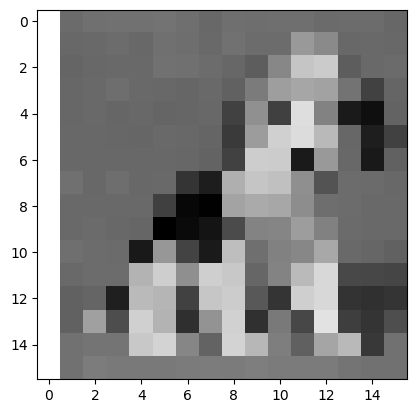

In [6]:
makepixelimage("images", 16)

1b) Create a 32x32 pixel image.

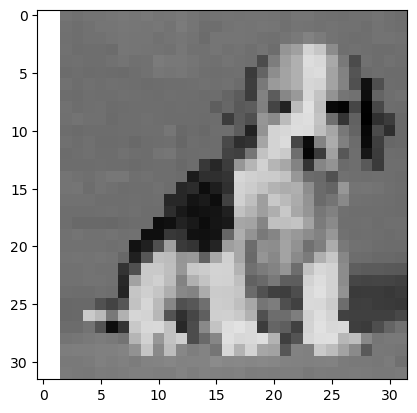

In [8]:
makepixelimage("images", 32)

2) Upload a different image into a folder called "my_images". Then use the makepixelimage( , ) function  to create an 8x8, 16x16 and 32x32 pixel image and see if the others in the class can guess your original image

**Many answers possible.**

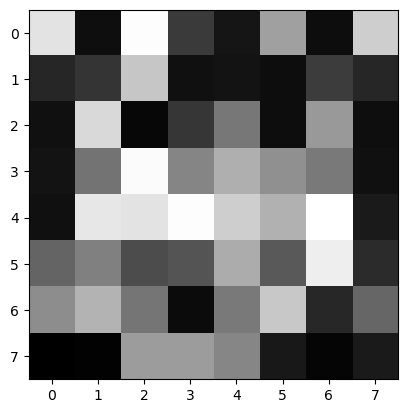

In [9]:
makepixelimage("my_images", 8)

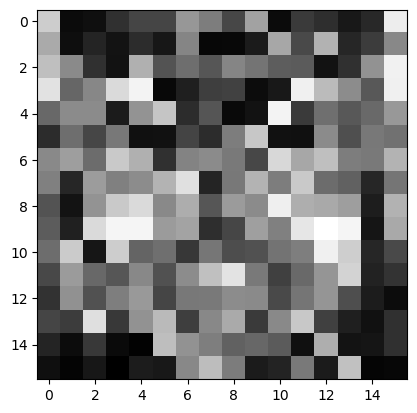

In [10]:
makepixelimage("my_images", 16)

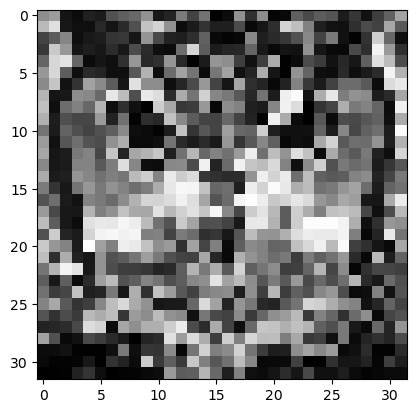

In [11]:
makepixelimage("my_images", 32)

**WORD CLOUDS** 
**Many Possible Answers**

In [19]:
with open('john.txt','r') as file:  #read in the text file
    gospeljohn = file.readlines()

Word Cloud of Gospel of John with 30 words

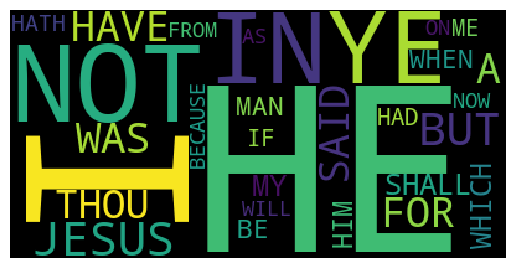

In [23]:
myimagejohn = calculate_frequencies(gospeljohn)
plt.imshow(myimagejohn, interpolation = 'nearest')
plt.axis('off')
plt.savefig('john.png', bbox_inches='tight')
plt.show()

**Name that Tune!**
**many possible answers**

In [41]:
saintsaens = [so, so , so, so, la, la,la,la,so, so , do1, do1, so, so,fa,fa,mi,mi,fa,so,la,la,fa,fa,re,re,re,re,so,so,so,so]
play(saintsaens)

**Random Numbers and Pi**

Percentage of Blue Points= 78.24
Estimate of Pi= 3.1296


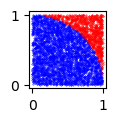

In [52]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1232023) 
def dist(x,y):
    d=np.sqrt(x**2+y**2)
    return d
fig=plt.figure(figsize=(1,1))
N=5000
blue=0
red=0
for n in np.arange(0,N,1):
    x=np.random.rand(1)
    y=np.random.rand(1)
    if dist(x,y)<=1:
        plt.scatter(x, y,s=.1,  marker='o', color='blue')
        blue=blue+1
    else:
        plt.scatter(x, y,s=.1,  marker='o', color='red')
        red=red+1
print("Percentage of Blue Points=", (blue/N)*100)
print("Estimate of Pi=", 4* (blue/N))

### Simulating Formula 1

In [59]:
# frame 0
c1=car(.43,.15,'car1.png',.14,0)
c2=car(.2,.15,'car2.png',.12,0)
simulate(c1,c2,0)
#frame 1
c1.speed=.8
c1.go(.2,0)
c2.speed=.8
c2.go(.2,0)
simulate(c1,c2,1)
#frame 2
c1.speed=.9
c1.size=c1.size*.9
c1.go(.2,.15)
c1.image="car1left.png"
c2.speed=.9
c2.size=c2.size*.9
c2.go(.35,.15)
c2.image="car2left.png"
simulate(c1,c2,2)
frames=3
from PIL import Image
images = []
for n in range(frames):
    exec('a'+str(n)+'=Image.open("'+str(n)+'.png")')
    images.append(eval('a'+str(n)))
images[0].save('F1a.gif',
               save_all=True,
               append_images=images[1:],
               duration=300,
               loop=0)

<img src="F1a.gif" width="750" align="center">